# 1. problem startement
#### predict salary based number years of expirenc. 

### 2. Data Gathering

In [68]:
# import all required library

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [43]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 3. EDA

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [45]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [46]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\RJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


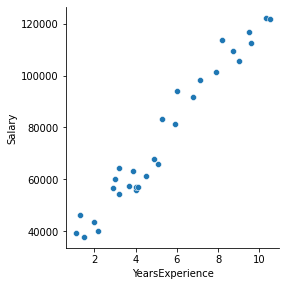

In [47]:
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],size=4)

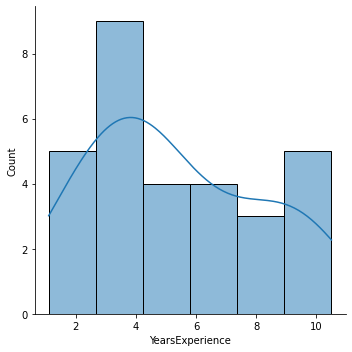

In [48]:
sns.displot(df['YearsExperience'],kde=True)

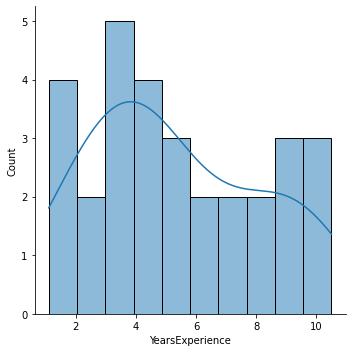

In [49]:
sns.displot(df['YearsExperience'],bins=10,kde=True)

<AxesSubplot:>

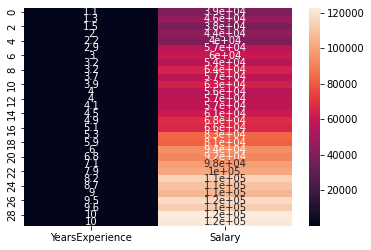

In [50]:
sns.heatmap(df,annot=True)

In [51]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [52]:
x = df['YearsExperience']
y = df['Salary']

In [53]:
x.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [54]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [55]:
## Step 4. Feature Engg
## step 5. Feature Selction


In [56]:
# Split data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24,), (6,), (24,), (6,))

In [58]:
## step 6. Model Training

# model =LinearRegression()
# model.fit(x_train,y_train)

In [59]:
x_train = x_train[:,np.newaxis]   
y_train = y_train[:,np.newaxis]

x_test = x_test[:,np.newaxis]
y_test = y_test[:,np.newaxis]

C:\Users\RJ\AppData\Local\Temp\ipykernel_16468\250619650.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
C:\Users\RJ\AppData\Local\Temp\ipykernel_16468\250619650.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:,np.newaxis]
C:\Users\RJ\AppData\Local\Temp\ipykernel_16468\250619650.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]
C:\Users\RJ\AppData\Local\Temp\ipykernel_16468\250619650.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be 

In [60]:
x_train.shape

(24, 1)

In [61]:
lr_model =LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [73]:
# Model Evalution

y_pred = lr_model.predict(x_test)
y_pred

mse = mean_squared_error(y_test,y_pred)
print(f"Mean_Squared_Error ==",mse)

r2 = r2_score(y_test,y_pred)
print(f"R2 Score== {r2}")

Mean_Squared_Error == 9785570.138914317
R2 Score== 0.9816423482070253


In [63]:
# Test User input
res = lr_model.predict([[10.0]])
res

array([[119657.72656781]])

In [71]:
res = lr_model.predict([[15.0]])
res

array([[166442.04153551]])

In [65]:
res = lr_model.predict([[20.0]])
res

array([[213226.3565032]])

In [75]:
# Pikle file
import pickle
with open('model_lr.pkl','wb') as file:
    pickle.dump(lr_model,file)
    

In [80]:
data =np.array([11])

data

array([11])